<a href="https://colab.research.google.com/github/ppkgtmm/sentiment/blob/main/sentiment_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import re
import nltk

In [95]:
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
cols = ['text', 'target']

##Read

In [40]:
data = pd.read_csv('/content/drive/MyDrive/sa/data/data.csv')[cols]
data.sample(5)

,text,target
90411,"A tough go , but Leigh 's depth and rigor , an...",positive
8032,Good tablet for kids and easy to use. Great fo...,positive
62192,"While many unfortunately passed on, the ballro...",positive
56826,I've read up a little bit on Che before watchi...,positive
90563,"In the end , White Oleander is n't an adaptati...",neutral


## EDA

In [ ]:
data.target.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
t_count = data.groupby('target').count().reset_index()

In [ ]:
t_count['proportion'] = t_count['text'] / sum(list(t_count['text']))
t_count

,target,text,proportion
0,negative,34981,0.351564
1,neutral,2242,0.022532
2,positive,62278,0.625903


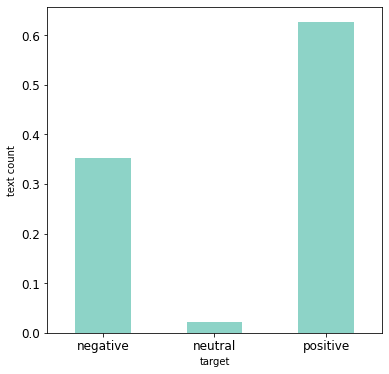

In [ ]:
t_count.plot(x='target', y='proportion', kind='bar',colormap='Set3', ylabel='text count', legend=False, rot=0, figsize=(6,6), fontsize=12)

In [ ]:
copy = data.copy()
copy['word_count'] = copy['text'].apply(lambda x: len(x.split(' ')))

In [ ]:
def avg_word_length(text):
    words = text.split(' ')
    length = [len(w) for w in words]
    return math.ceil(sum(length) / len(length))

copy['avg_word_length'] = copy['text'].apply(avg_word_length)

In [ ]:
copy.sample(5)

,text,target,word_count,avg_word_length
39519,A dangerous psychopathic killer Jacob Goodnigh...,positive,123,6
86644,I got to see an early preview of this movie an...,negative,372,5
35841,if the idea of the white man arriving on forei...,negative,35,4
94560,Even if the Naipaul original remains the real ...,positive,18,5
31888,Would highly recommend this product. Offers va...,positive,10,6


In [41]:
copy.groupby('target').describe().reset_index().transpose()

0         1         2
target                 negative   neutral  positive
word_count      count     34981      2242     62278
                mean    169.874   18.5642   110.285
                std     168.399   9.23416   152.656
                min           1         2         1
                25%          32        11        17
                50%         135        18        40
                75%         223        25       147
                max        1522        51      2470
avg_word_length count     34981      2242     62278
                mean    4.99751   4.75335   4.95986
                std    0.544182  0.859262   1.12055
                min           1         2         2
                25%           5         4         5
                50%           5         5         5
                75%           5         5         5
                max          12         8       112

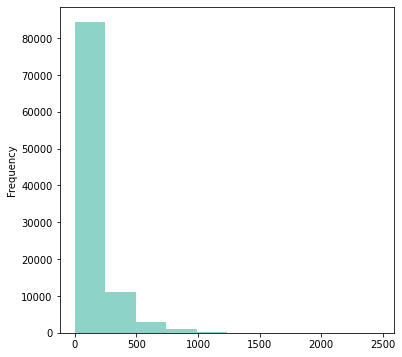

In [48]:
copy['word_count'].plot(kind='hist', figsize=(6,6), colormap='Set3')

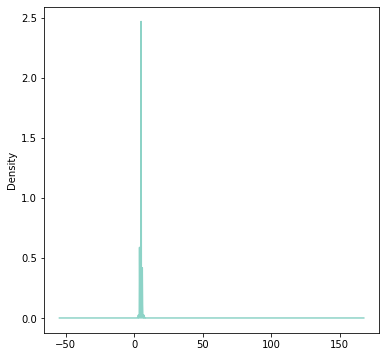

In [50]:
copy['avg_word_length'].plot(kind='density', figsize=(6,6), colormap='Set3')

In [76]:
targets = ['positive', 'negative']
removed = data[data['target'].isin(targets)]

In [52]:
removed.sample(5)

,text,target
95876,works on the whodunit level as its larger them...,negative
57052,"This cartoon was strange, but the story actual...",positive
95239,"Imagine Kevin Smith , the blasphemous bad boy ...",negative
13611,I bought this Kindle because I needed somethin...,positive
50274,"The first of the official Ghibli films, Laputa...",positive


In [67]:
t_dist = removed.groupby('target').count().reset_index()
t_dist['proportion'] = t_dist['text'] / sum(list(t_dist['text']))
t_dist

,target,text,proportion
0,negative,34981,0.359669
1,positive,62278,0.640331


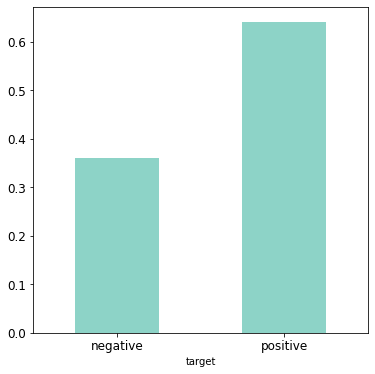

In [79]:
t_dist.plot(x='target',y='proportion', kind='bar', colormap='Set3', rot=0, fontsize=12, figsize=(6,6), legend=False)

In [72]:
removed.describe().transpose()

,count,unique,top,freq
text,97259,96818,Loved today's show!!! It was a variety and not...,5
target,97259,2,positive,62278


In [77]:
removed = removed.drop_duplicates(subset='text', keep='last')

In [78]:
removed.describe().transpose()

,count,unique,top,freq
text,96818,96818,I saw this movie for the first time just a sho...,1
target,96818,2,positive,62157


In [86]:
no_dup_count = removed.groupby('target').count().reset_index()
no_dup_count['proportion'] = no_dup_count['text'] / sum(list(no_dup_count['text']))
no_dup_count

,target,text,proportion
0,negative,34661,0.358002
1,positive,62157,0.641998


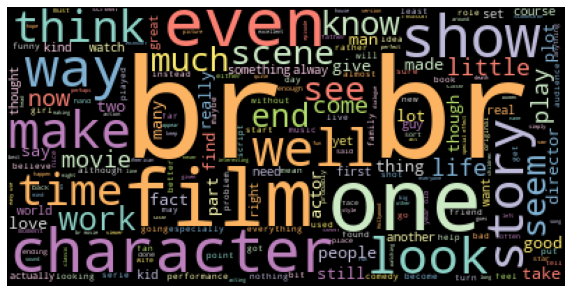

In [82]:
wordcloud = WordCloud(colormap='Set3').generate(' '.join(removed['text'].astype(str)))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Preprocess

In [99]:
class PolarityModel:

    reserved_words = ["EMAIL", "NUMBER", "MENTION", "URL"]

    def __init__(self, **args):
       pass

    def substitute(self, doc):
        doc = re.sub(r"<br />", " ", doc)
        doc = re.sub(r"\S+@\S+", " EMAIL ", doc)
        doc = re.sub(r"@\S+", " MENTION ", doc)
        doc = re.sub(r"https?:\S+|http?:\S+", " URL ", doc)
        doc = re.sub(r"(\d+\-\d+)|\d+", " NUMBER ", doc)
        doc = re.sub(r"[^A-Za-z']", " ", doc)

        return doc

    def expand(self, token):
        token_dict = {
            "ca": "can",
            "wo": "will",
            "sha": "shall",
            "'ve": "have",
            "'ll": "will",
            "'m": "am",
            "n't": "not",
            "'re": "are",
        }
        word_dict = {
            "cant": "can not",
            "couldnt": "could not",
            "wont": "will not",
            "pls": "please",
            "plz": "please",
            "youre": "you are",
            "theyre": "they are",
            "ive": "I have",
            "havent": "have not",
            "hasnt": "has not",
            "hadnt": "had not",
            "im": "I am",
            "didnt": "did not",
            "dont": "do not",
            "doesnt": "does not",
            "gotta": "got to",
            "wanna": "want to",
            "gonna": "going to",
            "wannabe": "want to be",
            "cannot": "can not",
        }
        if token in self.reserved_words:
            return token
        token = token.lower()
        if token.lower().strip() == "let's":
            return "let us"

        if token.lower().strip() == "'twas":
            return "it was"

        if word_dict.get(token, None):
            return word_dict.get(token)
        tokens = word_tokenize(token)
        if len(tokens) == 1:
            return word_dict.get(tokens[0], tokens[0])
        for i in range(len(tokens)):
            tokens[i] = token_dict.get(tokens[i], tokens[i])

        return " ".join(tokens)

    def preprocess(self, doc):
        doc = str(doc)
        doc = self.substitute(doc)

        tokens = doc.split()
        doc = " ".join([self.expand(w) for w in tokens])

        tokens = doc.split()
        tokens = [word for word in tokens if word.isalpha()]

        tokens = [
            word.lower() if word not in self.reserved_words else word for word in tokens
        ]

        return " ".join(tokens)


In [100]:
polar_model = PolarityModel()

In [106]:
test_text = \
"cant access https:bit780.ly for 3rd time !! 😂, i don't know why :| 🧐"
polar_model.preprocess(test_text)

'can not access URL for NUMBER rd time i do not know why'

In [107]:
%%time
removed['text'] = removed['text'].apply(polar_model.preprocess)

CPU times: user 13min 56s, sys: 184 ms, total: 13min 56s
Wall time: 13min 59s


In [108]:
removed.sample(5)

,text,target
24433,alexa can be annoying sometimes when does not ...,positive
6780,great everyday simple web surfing and apps on ...,positive
83053,someone some day should do a study of architec...,negative
64062,not only why but what were they thinking this ...,negative
29578,this is so worth it if you are tired of cable ...,positive


In [109]:
removed.to_csv('data_processed.csv')

## Visualization

In [110]:
no_dup = pd.read_csv('/content/data_processed.csv')[cols]
no_dup.sample(5)

,text,target
34487,an ultra low budget indie debut that smacks mo...,negative
2752,this is my first fire kindle i love it it is f...,positive
44480,went to the premiere at the tribeca film festi...,positive
1363,better then a e book more options and versatility,positive
73983,i am surprised to read all the positive commen...,negative


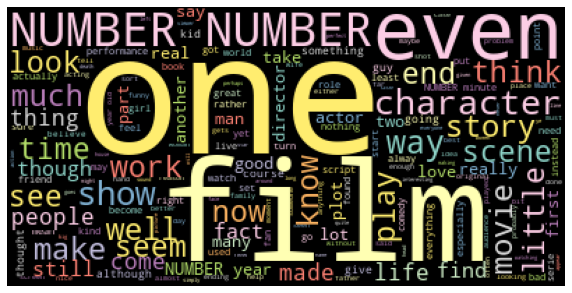

In [112]:
wordcloud = WordCloud(colormap='Set3').generate(' '.join(no_dup['text'].astype(str)))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()